# 0. Import the libraries

In [1]:
# data processing
import pandas as pd 
import numpy as np
from math import exp, log, sqrt
from sklearn.metrics import mean_squared_error
import warnings

# data visualization
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

# Statsmodel
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# 1.1 Moving Average model

Predicted=42.500000, Expected=43.000000
Predicted=43.000000, Expected=38.000000
Predicted=42.750000, Expected=44.000000
Predicted=41.250000, Expected=35.000000
Predicted=40.000000, Expected=39.000000
Predicted=39.000000, Expected=35.000000
Predicted=38.250000, Expected=29.000000
Predicted=34.500000, Expected=49.000000
Predicted=38.000000, Expected=50.000000
Predicted=40.750000, Expected=59.000000
Predicted=46.750000, Expected=63.000000
Predicted=55.250000, Expected=32.000000
Predicted=51.000000, Expected=39.000000
Predicted=48.250000, Expected=47.000000
Predicted=45.250000, Expected=53.000000
Predicted=42.750000, Expected=60.000000
Predicted=49.750000, Expected=57.000000
Predicted=54.250000, Expected=52.000000
Predicted=55.500000, Expected=70.000000
Predicted=59.750000, Expected=90.000000
Predicted=67.250000, Expected=74.000000
Predicted=71.500000, Expected=62.000000
Predicted=74.000000, Expected=55.000000
Predicted=70.250000, Expected=84.000000
Predicted=68.750000, Expected=94.000000


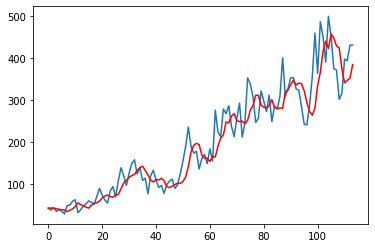

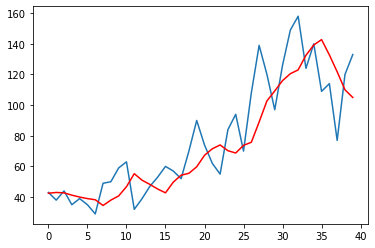

In [2]:
series = pd.read_csv('data_sample_2/data.csv', header=0, index_col=0)

# prepare situation and set window to 4 (4 months)
X = series.values
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length - window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('Predicted=%f, Expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test mean squared error: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:40])
plt.plot(predictions[0:40], color='red')
plt.show()

This is not the best approach for our case

# 1.2 ARIMA model

# 2. Read the data and split dataset

In [3]:
series= pd.read_csv('data_sample_2/data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
Name: Robberies, dtype: int64

In [4]:
# Check if there is any missing values in the dataset
print('Number of misisng values in the dataset : %s '% (np.sum(series.isna())))

Number of misisng values in the dataset : 0 


In [5]:
split_point= len(series) - 12
dataset, validation = series[0:split_point],series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset),len(validation)))

Dataset 106, Validation 12


In [6]:
# prepare data
X = np.delete(series.values, 0)

X = X.astype('float32')
train_size = int(len(X)*0.50)
train, test = X[0:train_size], X[train_size:]

In [7]:
# walk forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs= test[i]
    history.append(obs)
    print('Predicted=%d, Expected=%d' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

Predicted=174, Expected=178
Predicted=178, Expected=136
Predicted=136, Expected=161
Predicted=161, Expected=171
Predicted=171, Expected=149
Predicted=149, Expected=184
Predicted=184, Expected=155
Predicted=155, Expected=276
Predicted=276, Expected=224
Predicted=224, Expected=213
Predicted=213, Expected=279
Predicted=279, Expected=268
Predicted=268, Expected=287
Predicted=287, Expected=238
Predicted=238, Expected=213
Predicted=213, Expected=257
Predicted=257, Expected=293
Predicted=293, Expected=212
Predicted=212, Expected=246
Predicted=246, Expected=353
Predicted=353, Expected=339
Predicted=339, Expected=308
Predicted=308, Expected=247
Predicted=247, Expected=257
Predicted=257, Expected=322
Predicted=322, Expected=298
Predicted=298, Expected=273
Predicted=273, Expected=312
Predicted=312, Expected=249
Predicted=249, Expected=286
Predicted=286, Expected=279
Predicted=279, Expected=309
Predicted=309, Expected=401
Predicted=401, Expected=309
Predicted=309, Expected=328
Predicted=328, Expec

# 3. Data Analysis

In [8]:
series.head()

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
Name: Robberies, dtype: int64

In [9]:
series.describe()

count    118.000000
mean     196.288136
std      128.043602
min       29.000000
25%       85.500000
50%      166.000000
75%      296.750000
max      500.000000
Name: Robberies, dtype: float64

## Visualizations

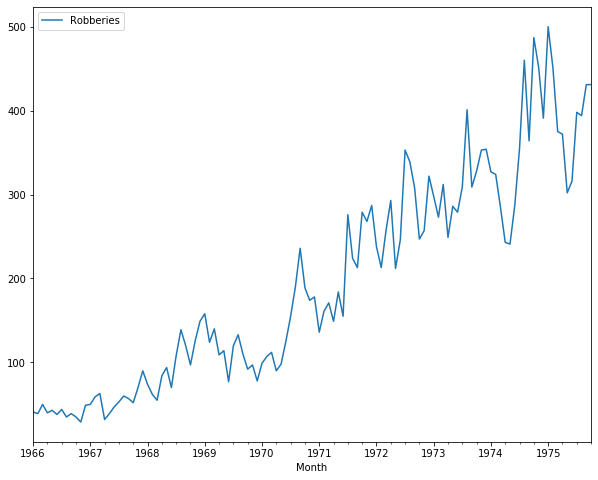

In [10]:
plt.figure(figsize=(10,8))
series.plot()
plt.legend()
plt.show()

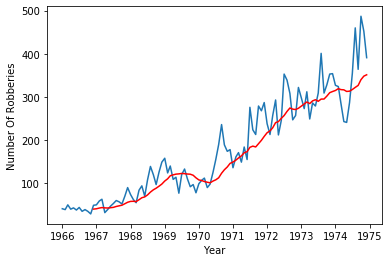

In [11]:
split_point = len(series) - 10
moving_avg = series[0:(split_point)].rolling(12).mean()
plt.plot(series[0:split_point])
plt.plot(moving_avg, color='red')
plt.xlabel('Year')
plt.ylabel('Number Of Robberies')
plt.show()

Observations: From year to year it has been observed an increasing trend; the large fluctiation are observed from year to year

### Kernel Density plot

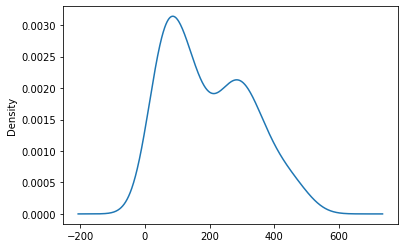

In [12]:
series.plot(kind='kde')
plt.show()

Observation: We have a bimodal distribution. The distribution is not Gaussian, it may be a n exponensial or a double Gaussian

# 4. ARIMA Models

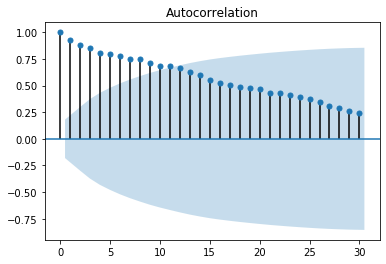

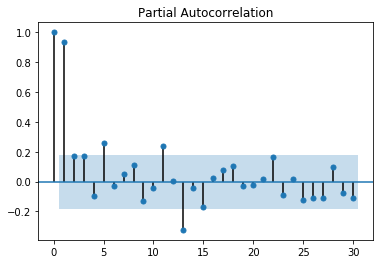

In [13]:
plot_acf(series,lags=30)
plt.show()
plot_pacf(series, lags=30)
plt.show()

Observations:
- ACF: lag values uptill 10 shows great correlation so we will consider p ~ 10 or 11, hence it is a AR(10) or AR(11) process
- PACF: lag values uptill q = 1 or q = 1 hense it is MA(1) or MA(2) process

In [14]:
# walkforward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%3.f'% (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' % rmse)

Predicted=185.001, Expected=178
Predicted=183.867, Expected=136
Predicted=146.348, Expected=161
Predicted=171.627, Expected=171
Predicted=170.289, Expected=149
Predicted=154.562, Expected=184
Predicted=185.945, Expected=155
Predicted=157.273, Expected=276
Predicted=245.401, Expected=224
Predicted=221.851, Expected=213
Predicted=219.694, Expected=279
Predicted=261.586, Expected=268
Predicted=264.165, Expected=287
Predicted=282.777, Expected=238
Predicted=255.808, Expected=213
Predicted=235.397, Expected=257
Predicted=257.892, Expected=293
Predicted=280.418, Expected=212
Predicted=235.530, Expected=246
Predicted=255.698, Expected=353
Predicted=318.731, Expected=339
Predicted=310.009, Expected=308
Predicted=306.664, Expected=247
Predicted=270.136, Expected=257
Predicted=283.623, Expected=322
Predicted=316.240, Expected=298
Predicted=294.473, Expected=273
Predicted=289.864, Expected=312
Predicted=315.007, Expected=249
Predicted=268.784, Expected=286
Predicted=303.638, Expected=279
Predicte

Observations: The result is lower than the persistence model

##  Review Residual Errors

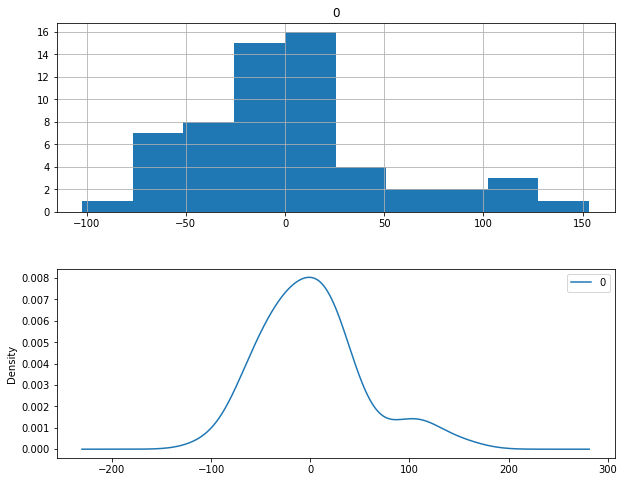

In [15]:
# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit=model.fit(disp=0)
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
# errors
residuals = [test[i] - predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
plt.figure(figsize=(10,8))
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde',ax=plt.gca())
plt.show()

## Box-Cox Transformed Dataset

/home/sabina/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Lambda: 0.327708


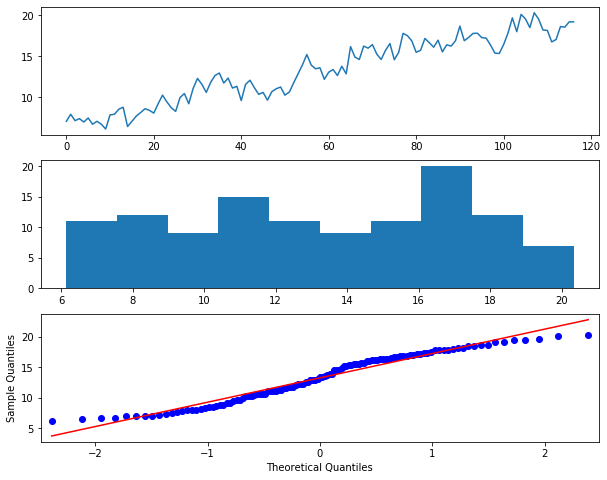

In [16]:
transformed, lam =boxcox(X)
print("Lambda: %f" % lam)
plt.figure(1,figsize=(10,8))
plt.subplot(311)
plt.plot(transformed)

# histogram
plt.subplot(312)
plt.hist(transformed)
plt.subplot(313)
qqplot(transformed, line='r',ax=plt.gca())
plt.show()

Observations: the large fluctuations has been removed; it is a more uniform distribution of values

In [17]:
# invert Box-Cox transform
def boxcox_inverse(value,lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1)/ lam)

In [18]:
# walk-forward validation
history=[x for x in train]
predictions= list()

for i in range(len(test)):
    # transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam= history, 1
        
    # predict
    model = ARIMA( transformed, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    
    # invert transformed prediction
    yhat = boxcox_inverse(yhat,lam)
    predictions.append(yhat)
    
    obs = test[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' % rmse)

Predicted=184.446, Expected=178.000
Predicted=186.576, Expected=136.000
Predicted=154.056, Expected=161.000
Predicted=176.353, Expected=171.000
Predicted=174.223, Expected=149.000
Predicted=160.011, Expected=184.000
Predicted=187.908, Expected=155.000
Predicted=161.427, Expected=276.000
Predicted=245.509, Expected=224.000
Predicted=211.700, Expected=213.000
Predicted=221.260, Expected=279.000


/home/sabina/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Predicted=262.707, Expected=268.000
Predicted=259.613, Expected=287.000
Predicted=283.238, Expected=238.000
Predicted=254.595, Expected=213.000
Predicted=241.924, Expected=257.000
Predicted=267.854, Expected=293.000
Predicted=286.560, Expected=212.000
Predicted=237.722, Expected=246.000
Predicted=266.132, Expected=353.000
Predicted=323.961, Expected=339.000
Predicted=317.972, Expected=308.000
Predicted=315.557, Expected=247.000
Predicted=279.443, Expected=257.000
Predicted=290.162, Expected=322.000
Predicted=324.661, Expected=298.000
Predicted=305.323, Expected=273.000
Predicted=297.758, Expected=312.000
Predicted=323.453, Expected=249.000
Predicted=276.034, Expected=286.000
Predicted=308.927, Expected=279.000
Predicted=292.276, Expected=309.000
Predicted=316.421, Expected=401.000
Predicted=370.054, Expected=309.000
Predicted=316.284, Expected=328.000
Predicted=346.135, Expected=353.000
Predicted=353.512, Expected=354.000
Predicted=358.565, Expected=327.000
Predicted=345.205, Expected=

# 5.  Model Validation

- Finalize Model : Train and save the final model.
- Make Prediction : Load the finalized model and make a prediction.
- Validate Model : Load and validate the final model.


In [19]:
transformed, lam = boxcox(X)

model = ARIMA(transformed, order=(0,1,2))
model_fit= model.fit(disp=0)

model_fit.save('data_sample_2/model.pkl')
np.save('data_sample_2/model_lambda.npy',[lam])

/home/sabina/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


### Make Prediction

In [20]:
model_fit= ARIMAResults.load('data_sample_2/model.pkl')
lam = np.load('data_sample_2/model_lambda.npy')
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat,lam)
print('Predicted: %.3f' % yhat)

Predicted: 424.858


### Validate Model

Predicted=424.858, Expected=452.000
Predicted=447.976, Expected=391
Predicted=408.371, Expected=500
Predicted=490.554, Expected=451
Predicted=443.787, Expected=375
Predicted=417.742, Expected=372
Predicted=416.002, Expected=302
Predicted=354.648, Expected=316
Predicted=362.060, Expected=398
Predicted=405.702, Expected=394
Predicted=392.564, Expected=431
Predicted=427.030, Expected=431
RMSE: 56.406


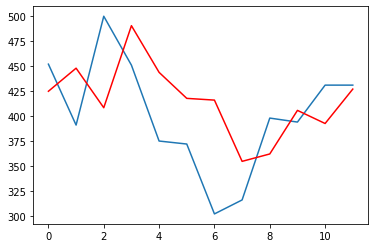

In [21]:
history = [x for x in X]
y = validation.values.astype('float32')
predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat,lam)
predictions.append(yhat)
history.append(y[0])
print('Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))

# rolling forecasts
for i in range(1,len(y)):
    transformed,lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
        
    # predict
    model = ARIMA(transformed, order=(0,1,2))
    model_fit= model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    
    # invert transformed prediction
    yhat = boxcox_inverse(yhat,lam)
    predictions.append(yhat)
    
    # observation
    obs = y[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(y,predictions))
print('RMSE: %.3f' %rmse)
plt.plot(y)
plt.plot(predictions,color='red')
plt.show()

This last plot compares the validation dataset and the predictions.
The graphic suggests that the time series has a trend, but it the model need to be improved